# Wind Farm Generation Example
### PIP Summer School 2018
Phillippe Phanivong & Elpiniki Apostolaki – Iosifidou

## Background Problem

It's March 1st, 2015. We know that on the 20th there will be a total solar eclipse over Europe affecting over 90GW of solar PV output. To ensure we have enough power during this outage, we need to have a the best estimate of power output from other generation sources in Europe. In this example we are trying to create a model of a wind farm's power output in Spain.

References and Sources:
 - https://www.reuters.com/article/us-solar-eclipse-germany/european-power-grids-keep-lights-on-through-solar-eclipse-idUSKBN0MG0S620150320
 - https://docstore.entsoe.eu/Documents/Publications/ENTSO-E%20general%20publications/entsoe_spe_pp_solar_eclipse_2015_web.pdf
 - http://www.sotaventogalicia.com/en

# Import required libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Needed to display plots in Jupyter Notebooks
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

## Load and read data

In [2]:
#funtion to import data as a pandas dataframe

def datareader(csvfile):
    data = pd.read_csv(csvfile)
    return data

In [4]:
#import data
winddata = datareader("windDatahr_month.csv")

## Inspect data

In [5]:
#return info of the dataframe
winddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 4 columns):
Time          723 non-null int64
Speed         723 non-null float64
Direction     723 non-null int64
Energy_kWh    723 non-null float64
dtypes: float64(2), int64(2)
memory usage: 22.7 KB


In [6]:
#return the first n rows
winddata.head(n=10)

,Time,Speed,Direction,Energy_kWh
0,1,4.86,133,4972.46
1,2,4.29,115,4523.10
2,3,4.15,117,3843.20
3,4,4.67,110,4342.16
4,5,5.99,116,5876.09
5,6,4.54,113,3808.24
6,7,5.97,133,5881.50
7,8,7.44,146,5546.10
8,9,6.07,156,3551.93
9,10,4.57,202,1829.70


In [7]:
#generate descriptive statistics
winddata.describe(include="all")

,Time,Speed,Direction,Energy_kWh
count,723.000000,723.000000,723.000000,723.000000
mean,12.481328,7.067178,220.002766,6226.232241
std,6.918851,2.724709,65.850666,3849.127962
min,1.000000,0.350000,2.000000,0.000000
25%,7.000000,5.200000,198.000000,3097.455000
50%,12.000000,6.750000,232.000000,5804.680000
75%,18.000000,8.460000,261.000000,9196.295000
max,24.000000,17.530000,355.000000,14841.150000


In [8]:
#compute pairwise correlation of columns
corr_matrix = winddata.corr()
corr_matrix["Energy_kWh"]

Time          0.011382
Speed         0.850844
Direction     0.072644
Energy_kWh    1.000000
Name: Energy_kWh, dtype: float64

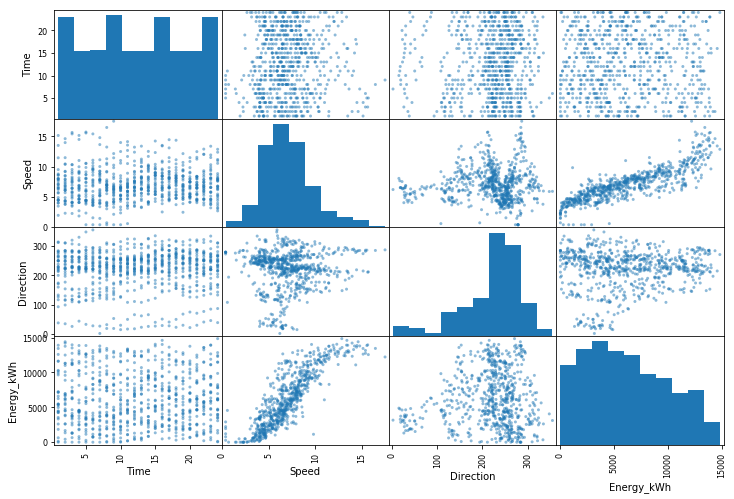

In [9]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Time", "Speed", "Direction","Energy_kWh"]
scatter_matrix(winddata[attributes], figsize=(12, 8))
plt.show()

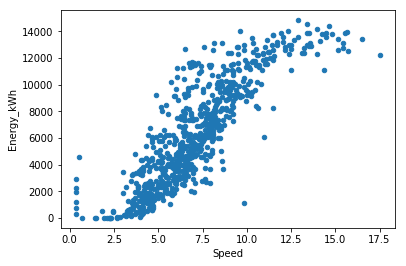

In [10]:
winddata.plot(kind="scatter", x="Speed", y="Energy_kWh")
plt.show()

In [11]:
#machine leaning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#machine leanring input data transform libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#machine leanirng validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


C:\Users\Phillippe\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Split the data into a training and testing data set

In [12]:
#split the data into 80% train and 20% test
train_set, test_set = train_test_split(winddata, test_size=0.2, random_state=42)

In [13]:
#keep data you need for each input 
x_train_set = train_set.drop("Energy_kWh", axis=1)
x_test_set = test_set.drop("Energy_kWh", axis=1)
y_train_set = train_set["Energy_kWh"].copy()
y_test_set = test_set["Energy_kWh"].copy()


## Scale the data

In [14]:
#normalize the data
scaler = StandardScaler()
scaler.fit(x_train_set)
x_train_scaled = scaler.transform(x_train_set)
scaler.fit(x_test_set)
x_test_scaled = scaler.transform(x_test_set)

In [15]:
x_test_set.head()

,Time,Speed,Direction
336,22,6.95,237
517,11,6.93,240
598,20,6.51,255
33,10,0.35,273
439,5,5.86,348


In [16]:
x_test_scaled[1:5,:]

array([[-0.35509127, -0.12765673,  0.26695411],
       [ 0.98808006, -0.28166416,  0.53329595],
       [-0.50433253, -2.54043973,  0.85290615],
       [-1.25053883, -0.52000898,  2.18461533]])

# Training Regression Models

### Linear Regression

In [19]:
#linear regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train_set)
y_predictions_train = lin_reg.predict(x_train_scaled)

#training set linear regression scores
lin_mse_train = mean_squared_error(y_train_set, y_predictions_train)
lin_rmse_train = np.sqrt(lin_mse_train)
print("Linear Regression")
print("Training Set Error")
print("Mean Squared Error: ", lin_rmse_train)
lin_mae_train = mean_absolute_error(y_train_set, y_predictions_train)
print("Mean Absolute Error: ", lin_mae_train)



Linear Regression
Training Set Error
Mean Squared Error:  1996.9797364091921
Mean Absolute Error:  1541.9121890310494


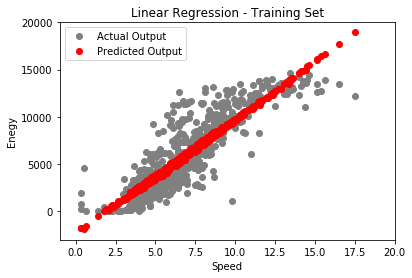

In [20]:
# Make the plot.
plt.clf()
plt.plot(x_train_set["Speed"], y_train_set, 'o', color='grey', label = 'Actual Output')
plt.plot(x_train_set["Speed"], y_predictions_train, 'o', color='red', label = 'Predicted Output')
plt.xlabel("Speed")
plt.ylabel("Enegy")
plt.title("Linear Regression - Training Set")
plt.legend()
plt.ylim((-3000, 20000))
plt.xlim((-1,20))
plt.savefig("linear_regression_train_set.png")

### Polynomial Regression

In [43]:
# PolynomialFeatures (prepreprocessing) 
poly = PolynomialFeatures(degree=3)
X_train = poly.fit_transform(x_train_scaled)

#linear regression model
linpoly = LinearRegression()
linpoly.fit(X_train, y_train_set)
y_predictions_train = linpoly.predict(X_train)

#linear regression scores
linpoly_mse = mean_squared_error(y_train_set, y_predictions_train)
linpoly_rmse = np.sqrt(linpoly_mse)
print('Degree '+ str(poly.degree) +' Polynomial Regression')
print("Training Set Error")
print("Mean Squared Error: ", linpoly_rmse)
linpoly_mae = mean_absolute_error(y_train_set, y_predictions_train)
print("Mean Absolute Error: ", linpoly_mae)

Degree 3 Polynomial Regression
Training Set Error
Mean Squared Error:  1705.3213736930977
Mean Absolute Error:  1259.547562347343


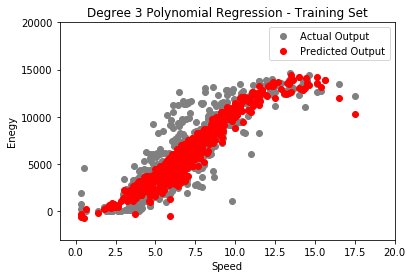

In [44]:
## Make the plot.
plt.clf()
plt.plot(x_train_set["Speed"], y_train_set, 'o', color='grey', label = 'Actual Output')
plt.plot(x_train_set["Speed"], y_predictions_train, 'o', color='red', label = 'Predicted Output')
plt.xlabel("Speed")
plt.ylabel("Enegy")
plt.title('Degree '+ str(poly.degree) +' Polynomial Regression - Training Set')
plt.legend()
plt.ylim((-3000, 20000))
plt.xlim((-1,20))
plt.savefig("polynomial_regression_train_set.png")

### Decision Tree Regression

In [23]:
#Decision Tree model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_set, y_train_set)
y_predictions_train = tree_reg.predict(x_train_set)

#Decision Tree regression scores
tree_mse = mean_squared_error(y_train_set, y_predictions_train)
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree Regression")
print("Training Set Error")
print("Mean Squared Error: ", tree_rmse)
tree_mae = mean_absolute_error(y_train_set, y_predictions_train)
print("Mean Absolute Error: ", tree_mae)

Decision Tree Regression
Training Set Error
Mean Squared Error:  0.0
Mean Absolute Error:  0.0


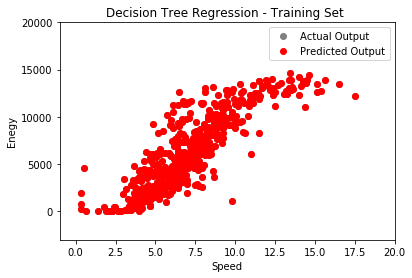

In [24]:
## Make the plot.
plt.clf()
plt.plot(x_train_set["Speed"], y_train_set, 'o', color='grey', label = 'Actual Output')
plt.plot(x_train_set["Speed"], y_predictions_train, 'o', color='red', label = 'Predicted Output')
plt.xlabel("Speed")
plt.ylabel("Enegy")
plt.title("Decision Tree Regression - Training Set ")
plt.legend()
plt.ylim((-3000, 20000))
plt.xlim((-1,20))
plt.savefig("decision_tree_regression_train_set.png")

### Random Forest Regression

In [25]:
#Random Forest model
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train_set, y_train_set)
y_predictions_train = forest_reg.predict(x_train_set)

#Random Forest scores
forest_mse = mean_squared_error(y_train_set, y_predictions_train)
forest_rmse = np.sqrt(forest_mse)
print("Random Forrest Regression")
print("Training Set Error")
print("Mean Squared Error: ", forest_rmse)
forest_mae = mean_absolute_error(y_train_set, y_predictions_train)
print("Mean Absolute Error: ", forest_mae)

Random Forrest Regression
Training Set Error
Mean Squared Error:  558.8309485949015
Mean Absolute Error:  379.01795501730106


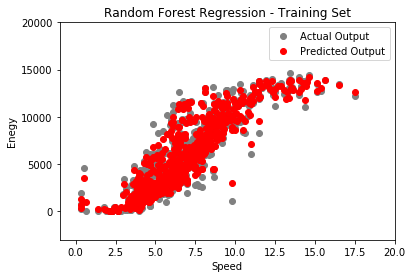

In [26]:
## Make the plot.
plt.clf()
plt.plot(x_train_set["Speed"], y_train_set, 'o', color='grey', label = 'Actual Output')
plt.plot(x_train_set["Speed"], y_predictions_train, 'o', color='red', label = 'Predicted Output')
plt.xlabel("Speed")
plt.ylabel("Enegy")
plt.title("Random Forest Regression - Training Set")
plt.legend()
plt.ylim((-3000, 20000))
plt.xlim((-1,20))
plt.savefig("random_forest_regression_train_set.png")

# Cross Validation

In [27]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Linear Regression

In [28]:
scores = cross_val_score(lin_reg, x_train_scaled, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)
display_scores(lin_reg_rmse_scores)

Scores: [2367.92074623 2033.78933383 1637.43941321 2299.57869936 2006.50041366
 1825.53019577 1884.9918293  1909.17660561 1903.60726879 2174.07490808]
Mean: 2004.2609413836667
Standard deviation: 211.91384643012253


### Polynomial Regression

In [45]:
scores = cross_val_score(lin_reg, X_train, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
poly_reg_rmse_scores = np.sqrt(-scores)
display_scores(poly_reg_rmse_scores)

Scores: [2144.15282276 1767.47105188 1662.68022179 1992.30898159 1719.66198859
 1689.85513768 1533.57546835 1543.31142772 1736.07088537 1890.58980311]
Mean: 1767.9677788844906
Standard deviation: 182.43593861263355


### Decision Tree Regression

In [48]:
scores = cross_val_score(tree_reg, x_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
decision_tree_rmse_scores = np.sqrt(-scores)
display_scores(decision_tree_rmse_scores)

Scores: [1594.44904398 1700.73266749 1959.7046894  1532.16984861 1560.32263806
 1565.36262812 1806.90140655 1573.88867257 1586.71794195 1524.61819252]
Mean: 1640.4867729251928
Standard deviation: 134.12581877120002


### Random Forest Regression

In [49]:
scores = cross_val_score(forest_reg, x_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [1794.05540277 1278.47768987 1316.69363209 1585.33331932 1301.27006304
 1284.35488984 1198.24203265 1272.24310447 1214.02191943 1176.77156917]
Mean: 1342.1463622638846
Standard deviation: 185.0496044272343


# Regression Model Testing

### Liner Regression

In [50]:
y_predictions = lin_reg.predict(x_test_scaled)

#linear regression scores
lin_mse = mean_squared_error(y_test_set, y_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression")
print("Test Set Error")
print("Mean Squared Error: ", lin_rmse)
lin_mae = mean_absolute_error(y_test_set, y_predictions)
print("Mean Absolute Error: ", lin_mae)


Linear Regression
Test Set Error
Mean Squared Error:  2152.2014831867127
Mean Absolute Error:  1649.636560416491


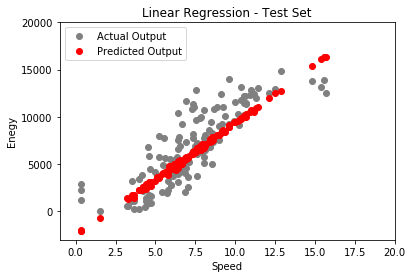

In [51]:
# Make the plot.
plt.clf()
plt.plot(x_test_set["Speed"], y_test_set, 'o', color='grey', label = 'Actual Output')
plt.plot(x_test_set["Speed"], y_predictions, 'o', color='red', label = 'Predicted Output')
plt.xlabel("Speed")
plt.ylabel("Enegy")
plt.title("Linear Regression - Test Set")
plt.legend()
plt.ylim((-3000, 20000))
plt.xlim((-1,20))
plt.savefig("linear_regression_test_set.png")

### Polynomial Regression

In [55]:
#Polynomial test
X_test = poly.fit_transform(x_test_scaled)
y_predictions = linpoly.predict(X_test)

#linear regression scores
linpoly_mse = mean_squared_error(y_test_set, y_predictions)
linpoly_rmse = np.sqrt(linpoly_mse)
print('Degree '+ str(poly.degree) +' Polynomial Regression')
print("Test Set Error")
print("Mean Squared Error: ", linpoly_rmse)
linpoly_mae = mean_absolute_error(y_test_set, y_predictions)
print("Mean Absolute Error: ", linpoly_mae)

Degree 3 Polynomial Regression
Test Set Error
Mean Squared Error:  1944.7822865781613
Mean Absolute Error:  1500.3114590704176


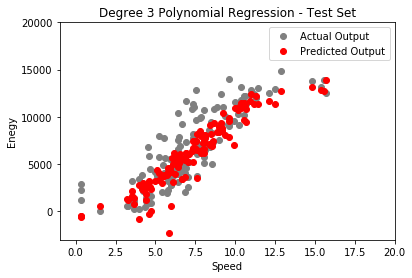

In [56]:
## Make the plot.
plt.clf()
plt.plot(x_test_set["Speed"], y_test_set, 'o', color='grey', label = 'Actual Output')
plt.plot(x_test_set["Speed"], y_predictions, 'o', color='red', label = 'Predicted Output')
plt.xlabel("Speed")
plt.ylabel("Enegy")
plt.title('Degree '+ str(poly.degree) +' Polynomial Regression - Test Set')
plt.legend()
plt.ylim((-3000, 20000))
plt.xlim((-1,20))
plt.savefig("polynomial_regression_test_set.png")

### Decision Tree Regression

In [57]:
#Decision Tree model
y_predictions = tree_reg.predict(x_test_set)

#Decision Tree regression scores
tree_mse = mean_squared_error(y_test_set, y_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree Regression")
print("Test Set Error")
print("Mean Squared Error: ", tree_rmse)
tree_mae = mean_absolute_error(y_test_set, y_predictions)
print("Mean Absolute Error: ", tree_mae)

Decision Tree Regression
Test Set Error
Mean Squared Error:  1451.6272802666954
Mean Absolute Error:  1097.2344137931036


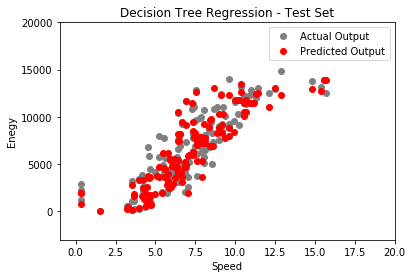

In [58]:
## Make the plot.
plt.clf()
plt.plot(x_test_set["Speed"], y_test_set, 'o', color='grey', label = 'Actual Output')
plt.plot(x_test_set["Speed"], y_predictions, 'o', color='red', label = 'Predicted Output')
plt.xlabel("Speed")
plt.ylabel("Enegy")
plt.title("Decision Tree Regression - Test Set")
plt.legend()
plt.ylim((-3000, 20000))
plt.xlim((-1,20))
plt.savefig("decision_tree_regression_test_set.png")

### Random Forest Regression

In [59]:
y_predictions = forest_reg.predict(x_test_set)

#Random Forest scores
forest_mse = mean_squared_error(y_test_set, y_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Random Forrest Regression")
print("Test Set Error")
print("Mean Squared Error: ", forest_rmse)
forest_mae = mean_absolute_error(y_test_set, y_predictions)
print("Mean Absolute Error: ", forest_mae)

Random Forrest Regression
Test Set Error
Mean Squared Error:  1293.1021540940512
Mean Absolute Error:  990.0633517241379


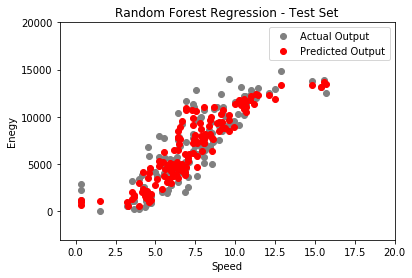

In [60]:
## Make the plot.
plt.clf()
plt.plot(x_test_set["Speed"], y_test_set, 'o', color='grey', label = 'Actual Output')
plt.plot(x_test_set["Speed"], y_predictions, 'o', color='red', label = 'Predicted Output')
plt.xlabel("Speed")
plt.ylabel("Enegy")
plt.title("Random Forest Regression - Test Set")
plt.legend()
plt.ylim((-3000, 20000))
plt.xlim((-1,20))
plt.savefig("random_forest_regression_test_set.png")